In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
import urllib.request
from pathlib import Path

MODEL_HUE_ORDER = ["test", "ASR", "GAN", "ESM-MSA"]



In [2]:
metrics_path = Path("../data/generated_metrics_table.csv")

if not metrics_path.exists():
    urllib.request.urlretrieve("https://zenodo.org/record/7688668/files/generated_metrics_table.csv", metrics_path)

data = pd.read_csv(metrics_path)
outdir = "figs"

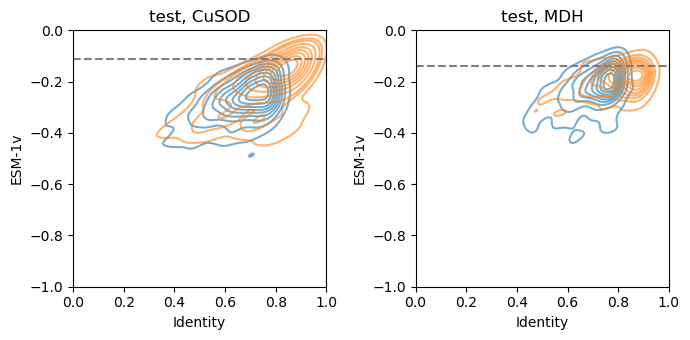

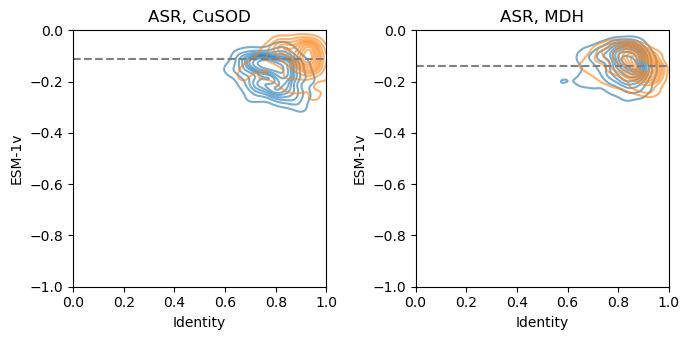

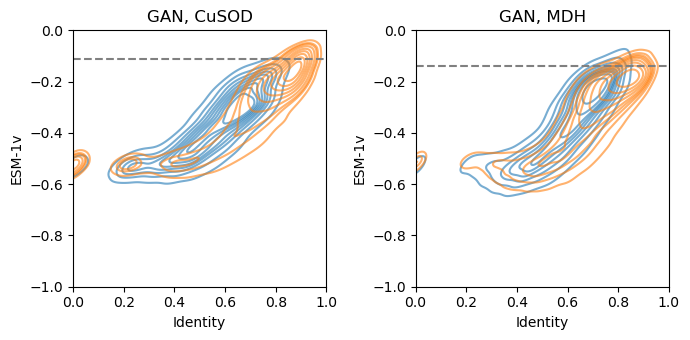

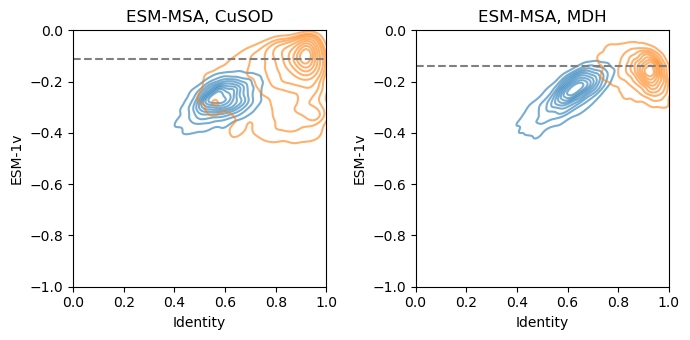

In [3]:
lims = {
"Identity": (0, 1),
"ESM-1v": (-1, 0)
}
esm1v_cutoffs = {'CuSOD': -0.111278511583805, 'MDH': -0.1379929780960083}
for model in ("test", "ASR", "GAN", "ESM-MSA"):
    fig, axes = plt.subplots(1, 2, figsize=(7,3.5))
    plot = 0
    for family in ("CuSOD","MDH"):
        #sns.scatterplot(x=x, y=y, data=df, alpha=0.6, ax=axes[plot // 2, plot % 2], hue="set", hue_order=(["passing", "control"]), style="activity")
        ax = sns.kdeplot(data=data[ (data["Model"] == model) & (data["Family"] == family) ], x="Identity", y="ESM-1v", hue_order=["round1", "round2"], hue="Round", common_norm=False, fill=False, ax=axes[plot], alpha=0.6)

        #sns.histplot(x=metric, hue="Round", common_norm=False, stat="density", ax=axes[plot]) 
        ax.set_xlim(lims["Identity"])
        ax.set_ylim(lims["ESM-1v"])
        ax.set_title(f"{model}, {family}")
        ax.axhline(esm1v_cutoffs[family], color="grey", linestyle="--")
        ax.get_legend().remove()
        plot += 1

    plt.tight_layout()
    plt.savefig(f"{outdir}/Supplemental_figure_comparing_{model}_round1_round2.png", dpi=300)


# Repeat lengths of Round2/3 generated sequences

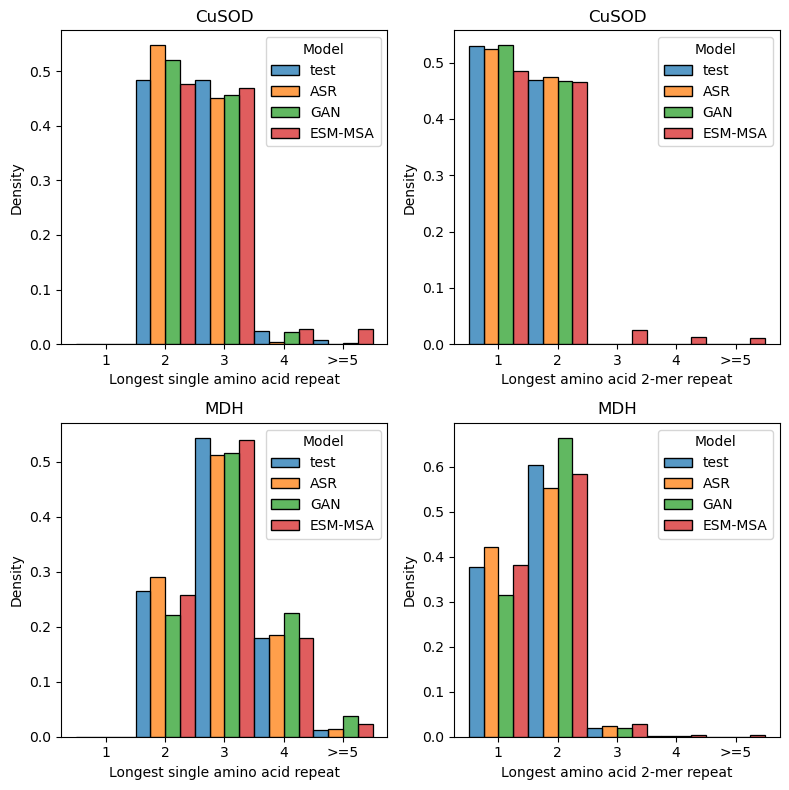

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(8,8))
plot = 0
for metric, family in (("longest_repeat_1","CuSOD"),("longest_repeat_1","MDH"),("longest_repeat_2","CuSOD"),("longest_repeat_2","MDH")):
    selected_data = data[( (data["Family"] == family) & (data["Round"] == 'round2') )]
    ax = sns.histplot(data = selected_data, x=-1 * selected_data[metric], hue_order=MODEL_HUE_ORDER, hue="Model", common_norm=False, binrange=(1,6), multiple='dodge', stat="density", binwidth=1, ax=axes[plot % 2,plot // 2])
    ax.set_xticks(np.arange(2-1/2, 6+1/2, 1), ("1","2","3","4", ">=5"))
    if metric == "longest_repeat_1":
        ax.set_xlabel("Longest single amino acid repeat")
    if metric == "longest_repeat_2":
        ax.set_xlabel("Longest amino acid 2-mer repeat")
    ax.set_title(f"{family}")
    plot += 1
plt.tight_layout()
plt.savefig(f"{outdir}/Supplemental_figure_comparing_repeat_lengths.png", dpi=300)


# Round3 ProteinMPNN cutoffs

In [5]:
selection_table_path = Path("../data/round3_selection_table.csv")

if not selection_table_path.exists():
    urllib.request.urlretrieve("https://zenodo.org/record/7688668/files/round3_selection_table.csv", selection_table_path)

round3_selection_data = pd.read_csv(selection_table_path, index_col=0)

CuSOD_MPNN_cutoff_GAN = min(round3_selection_data[(round3_selection_data["selection"].isin(['pass_structure-filter_selected', 'pass_structure-filter_not_selected'])) & 
                                          (round3_selection_data["Family"] == "CuSOD") &
                                          (round3_selection_data["Model"] == "GAN")
                                         ]['ProteinMPNN'])
print(len(round3_selection_data[(round3_selection_data["selection"].isin(['pass_structure-filter_selected', 'pass_structure-filter_not_selected'])) & 
                                          (round3_selection_data["Family"] == "CuSOD") &
                                          (round3_selection_data["Model"] == "GAN")
                                         ]['ProteinMPNN']))
CuSOD_MPNN_cutoff_ESM_MSA = min(round3_selection_data[(round3_selection_data["selection"].isin(['pass_structure-filter_selected', 'pass_structure-filter_not_selected'])) & 
                                          (round3_selection_data["Family"] == "CuSOD") &
                                          (round3_selection_data["Model"] == "ESM-MSA")
                                         ]['ProteinMPNN'])
print("CuSOD_MPNN GAN cutoff", CuSOD_MPNN_cutoff_GAN)
print("CuSOD_MPNN ESM_MSA cutoff", CuSOD_MPNN_cutoff_ESM_MSA)

                        
MDH_MPNN_cutoff_GAN = min(round3_selection_data[(round3_selection_data["selection"].isin(['pass_structure-filter_selected', 'pass_structure-filter_not_selected'])) & 
                                          (round3_selection_data["Family"] == "MDH") &
                                          (round3_selection_data["Model"] == "GAN")
                                         ]['ProteinMPNN'])
MDH_MPNN_cutoff_ESM_MSA = min(round3_selection_data[(round3_selection_data["selection"].isin(['pass_structure-filter_selected', 'pass_structure-filter_not_selected'])) & 
                                          (round3_selection_data["Family"] == "MDH") &
                                          (round3_selection_data["Model"] == "ESM-MSA")
                                         ]['ProteinMPNN'])
print("MDH_MPNN GAN cutoff", MDH_MPNN_cutoff_GAN)
print("MDH_MPNN ESM_MSA cutoff", MDH_MPNN_cutoff_ESM_MSA)



40
CuSOD_MPNN GAN cutoff -1.1572
CuSOD_MPNN ESM_MSA cutoff -1.0861
MDH_MPNN GAN cutoff -1.3644
MDH_MPNN ESM_MSA cutoff -1.2315
